<a href="https://colab.research.google.com/github/biapeters/machinelearning_DCV/blob/main/Atividade_Somativa1__MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

sns.set_style("whitegrid")

In [ ]:
# URLs dos datasets
URL_UCI = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
URL_BRASIL = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

df_uci = pd.read_csv(URL_UCI)
df_brasil = pd.read_csv(URL_BRASIL)

# Leitura dos dados
print("UCI:", df_uci.shape)
print("Brasil:", df_brasil.shape)

UCI: (303, 14)
Brasil: (14, 2)


In [ ]:
# Converte (1, 2, 3, 4) para 1 (Doença) e 0 (Sem Doença)
df_uci.loc[df_uci['num'] != 0, 'num'] = 1
df_uci['num'] = df_uci['num'].astype(int)
print("\nContagem da Variável 'num' (Após Binarização):")
print(df_uci['num'].value_counts())


Contagem da Variável 'num' (Após Binarização):
num
0    164
1    139
Name: count, dtype: int64


In [ ]:
# --- Novos Atributos (thalach e exang) ---
atributo1 = 'thalach' # Frequência cardíaca máxima atingida
atributo2 = 'exang'   # Angina induzida pelo exercício (0=Não, 1=Sim)

print("\n--- Estatísticas básicas ---")

print(f"\n{atributo1} (Frequência Cardíaca Máxima):")
# Apresenta a média, desvio padrão, mínimo, máximo, e quartis
print(df_uci[atributo1].describe())

print(f"\n{atributo2} (Angina Induzida por Exercício - Contagem):")
# Apresenta a contagem de cada categoria (0 ou 1)
print(df_uci[atributo2].value_counts())


--- Estatísticas básicas ---

thalach (Frequência Cardíaca Máxima):
count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

exang (Angina Induzida por Exercício - Contagem):
exang
0.0    204
1.0     99
Name: count, dtype: int64



--- Gerando novos gráficos ---


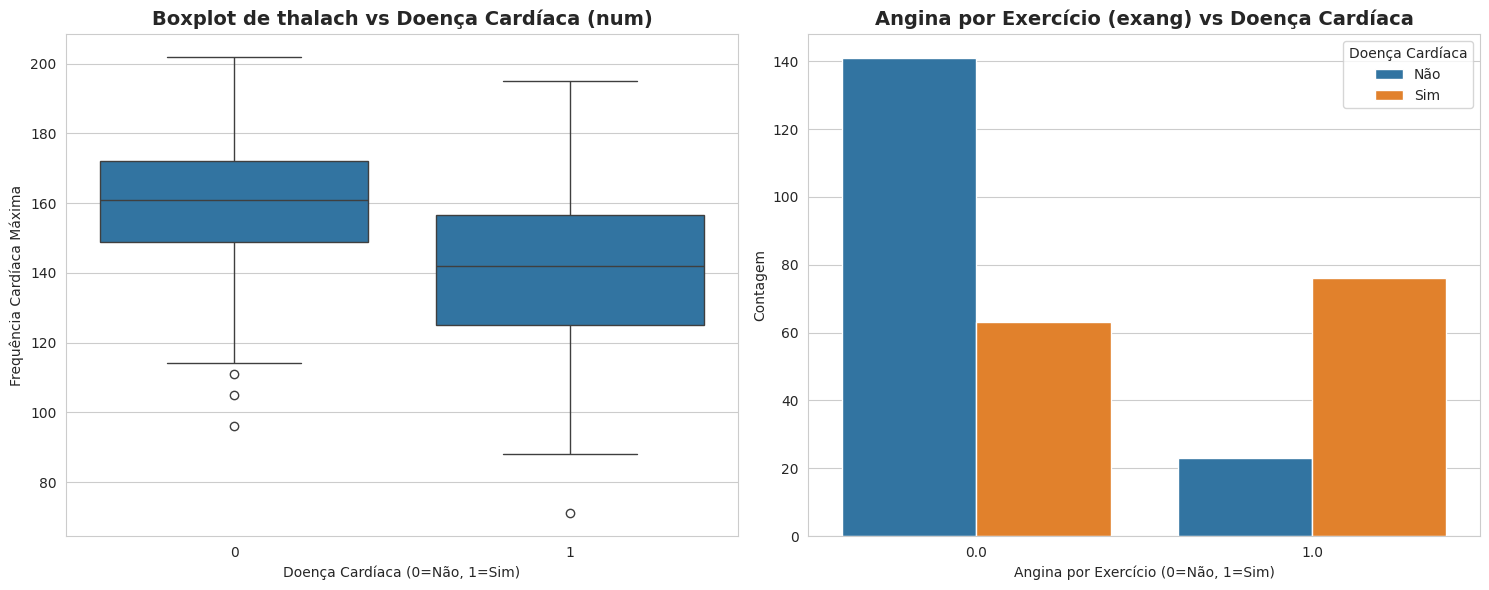

In [ ]:
# --- Gráficos (Boxplot e Gráfico de Barras) ---
print("\n--- Novos Gráficos ---")

plt.figure(figsize=(15, 6))

# Boxplot (Distribuição de 'thalach' vs 'num')
plt.subplot(1, 2, 1)
sns.boxplot(x='num', y=atributo1, data=df_uci)
plt.title(f"Boxplot de {atributo1} vs Doença Cardíaca (num)", fontsize=14, weight='bold')
plt.xlabel("Doença Cardíaca (0=Não, 1=Sim)")
plt.ylabel("Frequência Cardíaca Máxima")

# Gráfico de Barras (Contagem de 'exang' vs 'num')
plt.subplot(1, 2, 2)
# Separa por cor a doença
sns.countplot(x=atributo2, hue='num', data=df_uci)
plt.title(f"Angina por Exercício ({atributo2}) vs Doença Cardíaca", fontsize=14, weight='bold')
plt.xlabel("Angina por Exercício (0=Não, 1=Sim)")
plt.ylabel("Contagem")
plt.legend(title='Doença Cardíaca', labels=['Não', 'Sim'])
# Quem não tem angina (0) tem mais chances de não ter doença (barra azul maior).
plt.tight_layout()
plt.show()

In [ ]:
# --- Treinamento e Avaliação dos Modelos ---
target_col = "num"
X = df_uci.drop(columns=[target_col])
y = df_uci[target_col]

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
resultados = {}

# KNN e Gradient Boosting
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

print("\n--- Treinamento e Avaliação dos Modelos (KNN e Gradient Boosting) ---")

for nome, modelo in models.items():
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    resultados[nome] = acc

    print(f"\nModelo: {nome}")
    print(f"Acurácia: {acc:.4f}")
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


--- Treinamento e Avaliação de Modelos (KNN e Gradient Boosting) ---

Modelo: KNN
Acurácia: 0.9180
Matriz de Confusão:
 [[27  2]
 [ 3 29]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61


Modelo: GradientBoosting
Acurácia: 0.8525
Matriz de Confusão:
 [[25  4]
 [ 5 27]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
# Análise do modelo Random Forest (modelo de referência do professor)
# Acurácia do RF: 0.83529
rf_acc = 0.8353
if 'RandomForest' not in resultados:
    resultados['RandomForest (Ref)'] = rf_acc

melhor_modelo = max(resultados, key=resultados.get)
print(f"\nMelhor modelo (Entre os comparados): {melhor_modelo} (Acurácia = {resultados[melhor_modelo]:.4f})")


Melhor modelo (Entre os comparados): KNN (Acurácia = 0.9180)


In [ ]:
# --- Principais Achados ---
print("\n--- Relato de Principais Achados ---")
print(f"""
Com base na Análise Exploratória de Dados (EDA) e na Avaliação dos Modelos de Machine Learning, foi possivel identificar os seguintes pontos:

Relação entre Esforço Físico e Doença Cardíaca. A análise da Frequência Cardíaca Máxima (thalach) revelou um padrão importante. Pacientes sem doença cardíaca (grupo 0) tendem a alcançar uma frequência cardíaca máxima (mediana aproximadamente 162) maior durante o exercício, enquanto pacientes com doença cardíaca (grupo 1) alcançam uma frequência cardíaca máxima significativamente menor (mediana aproximadamente 135). Isso sugere que a menor capacidade de esforço é um forte indicador de presença de doença.

Angina Induzida por Exercício (exang). O gráfico de contagem mostrou que a ausência de Angina Induzida por Exercício (exang = 0) está fortemente associada à ausência de doença cardíaca (num = 0). Isso reforça a importância dos sintomas relacionados ao esforço como preditores.

Melhor Desempenho do Modelo. Dos modelos testados (KNN e Gradient Boosting), o KNN demonstrou a melhor performance: Melhor Modelo: KNN. Acurácia: 0.9180. Conclusão: A alta performance do KNN, um modelo baseado em distância, confirma a eficácia e a importância da etapa de padronização dos dados para este conjunto de atributos.
""")


--- Relato de Principais Achados ---

Com base na Análise Exploratória de Dados (EDA) e na Avaliação dos Modelos de Machine Learning, foi possivel identificar os seguintes pontos:

Relação entre Esforço Físico e Doença Cardíaca. A análise da Frequência Cardíaca Máxima (thalach) revelou um padrão importante. Pacientes sem doença cardíaca (grupo 0) tendem a alcançar uma frequência cardíaca máxima (mediana aproximadamente 162) maior durante o exercício, enquanto pacientes com doença cardíaca (grupo 1) alcançam uma frequência cardíaca máxima significativamente menor (mediana aproximadamente 135). Isso sugere que a menor capacidade de esforço é um forte indicador de presença de doença.

Angina Induzida por Exercício (exang). O gráfico de contagem mostrou que a ausência de Angina Induzida por Exercício (exang = 0) está fortemente associada à ausência de doença cardíaca (num = 0). Isso reforça a importância dos sintomas relacionados ao esforço como preditores.

Melhor Desempenho do Modelo. D